# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import sklearn.linear_model
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [3]:
#df_raw = pd.read_csv("../assets/admissions.csv")
df_raw = pd.read_csv("c:\\datascience\\admissions.csv")


In [5]:
df = df_raw.dropna() 
print (df.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [13]:
# frequency table for prestige and whether or not someone was admitted
gre_prestige_admit = pd.crosstab(index=df["admit"], columns=df["prestige"])
gre_prestige_admit

prestige,1.0,2.0,3.0,4.0
admit,,,,
0,28,95,93,55
1,33,53,28,12


In [14]:
# Check gre
gre_prestige_admit_all = pd.crosstab(index=df["gre"], columns=[df["prestige"], df["admit"]], margins=True)   
gre_prestige_admit_all

prestige 1.0     2.0     3.0     4.0      All
admit      0   1   0   1   0   1   0   1     
gre                                          
220.0      0   0   0   0   1   0   0   0    1
300.0      0   0   0   1   1   0   1   0    3
340.0      1   0   0   1   2   0   0   0    4
360.0      1   0   0   0   3   0   0   0    4
380.0      0   0   1   0   4   0   3   0    8
400.0      0   0   5   1   4   0   0   1   11
420.0      2   0   1   0   1   0   3   0    7
440.0      1   0   3   2   1   0   3   0   10
460.0      1   1   4   0   3   3   1   0   13
480.0      1   3   6   2   2   0   1   1   16
500.0      0   0   2   1   8   1   9   0   21
520.0      1   2   5   3   6   3   2   2   24
540.0      4   3   5   4   5   1   4   1   27
560.0      1   2   6   2   7   2   4   0   24
580.0      3   1  11   3   4   1   4   1   28
600.0      1   3   5   4   5   2   3   0   23
620.0      1   4   8   5   6   3   3   0   30
640.0      0   1   7   3   8   0   1   1   21
660.0      2   0   4   6   4   4   2   1   23
680.0      1   1   5   4   3   3   2   1   20
700.0      2   3  11   1   3   0   1   1   22
720.0      1   1   0   1   6   1   1   0   11
740.0      2   0   0   2   1   1   4   1   11
760.0      0   2   0   2   1   0   0   0    5
780.0      0   0   0   2   0   1   1   1    5
800.0      2   6   6   3   4   2   2   0   25
All       28  33  95  53  93  28  55  12  397

In [15]:
# Check gpa
gpa_prestige_admit_all = pd.crosstab(index=df["gpa"], columns=[df["prestige"], df["admit"]], margins=True)   
gpa_prestige_admit_all

prestige 1.0     2.0     3.0     4.0      All
admit      0   1   0   1   0   1   0   1     
gpa                                          
2.26       0   0   0   0   0   0   1   0    1
2.42       0   1   1   0   0   0   0   0    2
2.48       0   0   0   0   0   0   1   0    1
2.52       0   0   1   0   0   0   0   0    1
2.55       1   0   0   0   0   0   0   0    1
2.56       0   0   0   0   1   0   0   0    1
2.62       0   0   1   1   0   0   0   0    2
2.63       0   0   1   0   0   0   0   0    1
2.65       0   0   0   0   0   1   0   0    1
2.67       0   0   0   1   1   0   0   0    2
2.68       0   0   0   0   0   1   0   0    1
2.69       0   0   1   0   0   0   0   0    1
2.7        0   0   1   0   1   0   0   0    2
2.71       0   0   1   0   1   0   0   0    2
2.73       0   0   1   0   0   0   0   0    1
2.76       0   0   1   0   0   0   0   0    1
2.78       0   0   1   0   1   0   0   0    2
2.79       0   0   1   0   0   0   1   0    2
2.81       0   1   0   0   2   0   0   0    3
2.82       0   0   0   0   0   0   2   0    2
2.83       0   0   0   0   1   0   0   0    1
2.84       0   0   0   1   0   0   0   0    1
2.85       0   0   1   0   1   0   0   0    2
2.86       0   0   0   0   0   0   1   1    2
2.88       0   0   1   0   0   0   0   0    1
2.9        1   0   1   0   1   0   1   0    4
2.91       0   1   0   0   0   1   1   0    3
2.92       0   0   0   0   1   0   1   0    2
2.93       0   0   1   0   2   0   2   0    5
2.94       0   0   1   1   1   0   0   0    3
...       ..  ..  ..  ..  ..  ..  ..  ..  ...
3.7        0   1   1   0   0   0   0   1    3
3.71       0   1   0   0   0   0   0   1    2
3.72       0   0   1   0   0   0   0   0    1
3.73       1   0   0   0   1   0   0   0    2
3.74       0   1   0   1   0   0   1   1    4
3.75       0   0   1   1   0   0   0   0    2
3.76       0   0   0   0   1   1   0   0    2
3.77       0   0   0   1   3   0   1   0    5
3.78       0   0   1   1   1   0   1   0    4
3.8        0   0   1   0   0   1   0   0    2
3.81       0   2   1   0   0   0   0   0    3
3.82       0   0   0   0   1   0   0   0    1
3.83       0   0   1   0   0   0   0   0    1
3.84       0   0   0   1   1   0   0   0    2
3.85       0   0   0   0   0   1   0   0    1
3.86       0   0   0   1   1   0   0   0    2
3.87       0   0   0   0   0   0   1   0    1
3.88       0   0   0   1   1   0   1   0    3
3.89       0   1   1   0   1   0   0   0    3
3.9        1   0   1   0   0   1   0   0    3
3.91       0   0   0   0   1   0   0   0    1
3.92       0   0   1   0   0   0   1   0    2
3.93       0   0   1   0   0   0   0   0    1
3.94       0   0   1   1   2   0   1   0    5
3.95       0   0   0   2   0   2   1   0    5
3.97       1   0   0   0   0   0   0   0    1
3.98       0   0   0   1   0   0   0   0    1
3.99       0   0   0   0   2   1   0   0    3
4.0        3   6   4   4   7   3   1   0   28
All       28  33  95  53  93  28  55  12  397

[132 rows x 9 columns]

## Part 2. Return of dummy variables

In [44]:
prestige = pd.get_dummies(df.prestige)
prestige

,1.0,2.0,3.0,4.0
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
5,0,1,0,0
6,1,0,0,0
7,0,1,0,0
8,0,0,1,0
9,0,1,0,0


In [33]:
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
dummy_ranks.head()

,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


#### 2.1 Create class or dummy variables for prestige 

P Values: [3.97165549e-05 1.79787849e-01 1.47556001e-02 7.56841808e-03]
Coefficients: [ 0.21358332  0.03070782 -0.09599533 -0.14829581]
y-intercept: 0.3274002877387779
R-Squared: 0.06360716289507862


<function print>

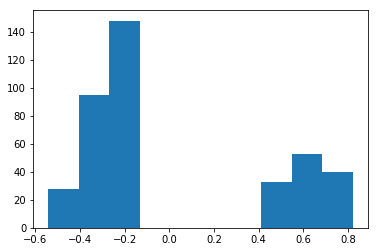

In [34]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X, y)
    residuals = (y - algo.predict(X)).values

    # print the necessary values
    print('P Values:', pvals)
    print('Coefficients:', algo.coef_)
    print('y-intercept:', algo.intercept_)
    print('R-Squared:', algo.score(X,y))
    plt.figure(figsize = [10,5])
    plt.figure();
    plt.hist(residuals);
    
    # keep the model
    return(algo, residuals)
lm = linear_model.LinearRegression()
y = df['admit']


get_linear_model_metrics(prestige[[1, 2, 3, 4]], y, lm)
print


P Values: [3.97165549e-05 1.79787849e-01 1.47556001e-02]
Coefficients: [0.36187913 0.17900363 0.05230048]
y-intercept: 0.17910447761194018
R-Squared: 0.06360716289507862


<function print>

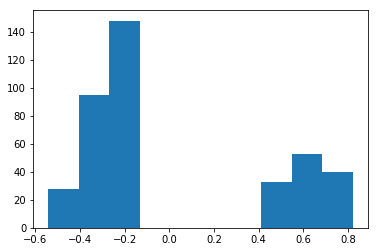

In [35]:
# drop the least significant, prestige  = 4
get_linear_model_metrics(prestige[[1, 2, 3]], y, lm)
print


#### 2.2 When modeling our class variables, how many do we need? 



In [37]:
#remove the first dummy variable
df_dummy3 = df[['admit', 'gre', 'gpa']].join(dummy_ranks.ix[:, 'prestige_2':])
#add an intercept:
df_dummy3['intercept'] = 1.0
df_dummy3.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0,intercept
0,0,380.0,3.61,0,1,0,1.0
1,1,660.0,3.67,0,1,0,1.0
2,1,800.0,4.00,0,0,0,1.0
3,1,640.0,3.19,0,0,1,1.0
4,0,520.0,2.93,0,0,1,1.0


Answer: There are three predictor variables: gre, gpa and prestige. The variables gre and gpa are continuous and prestige is categorical (3 variables)

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [41]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[['admit', 'gre', 'gpa']].join(dummy_ranks.ix[:, 'prestige_1':])
print (handCalc.head())

   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             0             1             0
1      1  660.0  3.67             0             0             1             0
2      1  800.0  4.00             1             0             0             0
3      1  640.0  3.19             0             0             0             1
4      0  520.0  2.93             0             0             0             1


In [47]:
#crosstab prestige 1 admission 

print (pd.crosstab(handCalc['admit'], handCalc['prestige_1.0'], rownames=['admit']))
# frequency table cutting prestige and whether or not someone was admitted


prestige_1.0    0   1
admit                
0             243  28
1              93  33


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [48]:
odds_exposed = 33.0/28
odds_exposed

1.1785714285714286

#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [116]:
odd_unexp = 93/243.0
odd_unexp

0.38271604938271603

#### 3.3 Calculate the odds ratio

In [117]:
OR = odds_exposed/odd_unexp
OR

3.079493087557604

#### 3.4 Write this finding in a sentenance: 

Answer: For students who attended a top ranked college, the odds of being admitted into graduate school are 3.07 times the odds of students who did not attend a top tier school.

#### 3.5 Print the cross tab for prestige_4

In [53]:
print (pd.crosstab(handCalc['admit'], handCalc['prestige_4.0'], rownames=['admit']))

prestige_4.0    0   1
admit                
0             216  55
1             114  12


#### 3.6 Calculate the OR 

In [54]:
OR = (12/55.0)/(114/216.0)
print (OR)

0.4133971291866028


#### 3.7 Write this finding in a sentence

Answer: 
The odds of being admitted to graduate school are 60% lower for students who attended a 4th tier school compared to students who did not attend a 4th tier school. OR For students who attended a 4th tier school the odds of being admitted into gradauate school are 0.41 times the odds of students who did not attend a 4th tier school.

## Part 4. Analysis

In [56]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
print (data.head())

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             1             0
1      1  660.0  3.67             0             1             0
2      1  800.0  4.00             0             0             0
3      1  640.0  3.19             0             0             1
4      0  520.0  2.93             0             0             1


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [62]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [68]:
train_cols = data.columns[1:]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4,intercept], dtype=object)

#### 4.2 Fit the model

In [75]:
logit = sm.Logit(data['admit'], data[train_cols])


In [76]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [77]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Sun, 22 Apr 2018   Pseudo R-squ.:                 0.08166
Time:                        12:31:34   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043    7.44e-05       0.004
gpa              0.7793      0.333      2.344      0.019       0.128       1.431
prestige_2.0    -0.6801      0.317     -2.146      0.032      -1.301      -0.059
prestige_3.0    -1.3387      0.345     -3.882      0.000      -2.015      -0.663
prestige_4.0    -1.5534      0.417     -3.721      0.000      -2.372      -0.735
intercept       -3.8769      1.142     -3.393      0.001      -6.116      -1.638
================================================================================
"""

In [78]:
print (np.exp(result.params))

gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
intercept       0.020716
dtype: float64


#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [81]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']

print (np.exp(conf))

                  2.5%     97.5%        OR
gre           1.000074  1.004372  1.002221
gpa           1.136120  4.183113  2.180027
prestige_2.0  0.272168  0.942767  0.506548
prestige_3.0  0.133377  0.515419  0.262192
prestige_4.0  0.093329  0.479411  0.211525
intercept     0.002207  0.194440  0.020716


In [83]:
print(np.exp(result.params))

gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
intercept       0.020716
dtype: float64


#### 4.5 Interpret the OR of Prestige_2

Answer: Prestige 1 acts  as a baseline, so the 0.506548 for prestige_2 means we expect a 50% drop in the probability of being accepted if the student was from a prestige = 2 school compared with a prestige = 1 school, while holding GRE and GPA fixed.

#### 4.6 Interpret the OR of GPA

Answer: GPA has a bigger impact on the odds of being accepted than GRE, although this is because the GRE has a larger range; a one-unit change in GPA is much bigger than a one-unit change in GRE (refer back to the df.hist() histograms to see this). GRE still has a significant effect on the odds ratio, as we see from its p-value.

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [97]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    m = int(m)
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in range(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out




In [99]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print (gres)

gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print (gpas)


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))
combos

[220.         284.44444444 348.88888889 413.33333333 477.77777778
 542.22222222 606.66666667 671.11111111 735.55555556 800.        ]
[2.26       2.45333333 2.64666667 2.84       3.03333333 3.22666667
 3.42       3.61333333 3.80666667 4.        ]


,0,1,2,3
0,220.0,2.260000,1.0,1.0
1,220.0,2.260000,2.0,1.0
2,220.0,2.260000,3.0,1.0
3,220.0,2.260000,4.0,1.0
4,220.0,2.453333,1.0,1.0
5,220.0,2.453333,2.0,1.0
6,220.0,2.453333,3.0,1.0
7,220.0,2.453333,4.0,1.0
8,220.0,2.646667,1.0,1.0
9,220.0,2.646667,2.0,1.0


#### 5.1 Recreate the dummy variables

In [104]:
# recreate the dummy variables
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige')
dummy_ranks.columns = ['prestige_1.0', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']

# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2.0':])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


#### 5.2 Make predictions on the enumerated dataset

In [107]:
combos['admit_pred'] = result.predict(combos[train_cols])

print (combos.tail())
len(combos)

       gre       gpa  prestige  intercept  prestige_2.0  prestige_3.0  \
395  800.0  3.806667       4.0        1.0             0             0   
396  800.0  4.000000       1.0        1.0             0             0   
397  800.0  4.000000       2.0        1.0             1             0   
398  800.0  4.000000       3.0        1.0             0             1   
399  800.0  4.000000       4.0        1.0             0             0   

     prestige_4.0  admit_pred  
395             1    0.334286  
396             0    0.734040  
397             0    0.582995  
398             0    0.419833  
399             1    0.368608  


400

#### 5.3 Interpret findings for the last 4 observations

Answer: 
Given the same GPA and GRE scores
 - student who attended a tier 4 undergraduate school had a 37% probablity of being admitted into grad school
 - student who attended a tier 1 undergraduate school school had a 73% likelihood of being admitted into grad school
 - student who attended a tier 3 undergraduate school had a 42% probablity of being admitted into grad school
 - student who attended a tier 2 undergraduate school had a 58% probablity of being admitted into grad school



## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


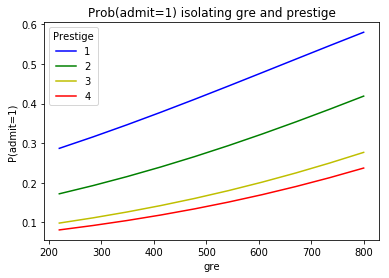

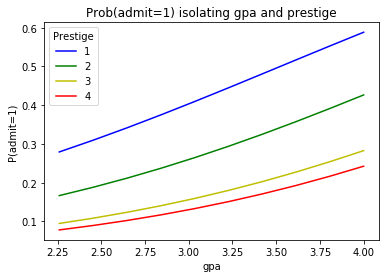

In [118]:

def isolate_and_plot(variable):
# isolate gre and class rank
  grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'prestige'],aggfunc=np.mean)



# make a plot
  colors = 'rbgyrbgy'
  for col in combos.prestige.unique(): 
    plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
    pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'],
    color=colors[int(col)])

  pl.xlabel(variable)
  pl.ylabel("P(admit=1)")
  pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
  pl.title("Prob(admit=1) isolating " + variable + " and prestige")
  pl.show()

 

isolate_and_plot('gre')
isolate_and_plot('gpa')